# Pymaceuticals Inc.
---

### Analysis

- I observed that Capomulin and  Ramicane both had lower stats all throughout the observed and calculated data.

- 7/10 drugs regimens averaged around the same timepoints which can be seen on the bar graph.

- From the pie chart it is shown that the drug regimens do not differ in results depending on gender given that the results for males were 50% and females was 49%.


In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [47]:
# Checking the number of mice.
mouse_count = df['Mouse ID'].nunique()
mouse_count

249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
mouse_duplicates

array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = df.loc[df["Mouse ID"] == "g989", :]
duplicate



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df['Mouse ID'] == 'g989'
df = df[~mask]
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [54]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = df['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen = df.groupby(['Drug Regimen'])

drug_regimen_mean = drug_regimen['Tumor Volume (mm3)'].mean()
drug_regimen_med = drug_regimen['Tumor Volume (mm3)'].median()
drug_regimen_var = drug_regimen['Tumor Volume (mm3)'].var()
drug_regimen_std = drug_regimen['Tumor Volume (mm3)'].std()
drug_regimen_sem =drug_regimen['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.

drug_regimen_df = pd.DataFrame({
                        "Mean Tumor Volume": drug_regimen_mean,
                        "Median Tumor Volume" : drug_regimen_med,
                        "Tumor Volume Var" : drug_regimen_var,
                        "Tumor Volume Std. Dev. " : drug_regimen_std,
                        "Tumor Volume Std. Err." : drug_regimen_sem
                        })

drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Var,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_drug_regimen = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
new_drug_regimen


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

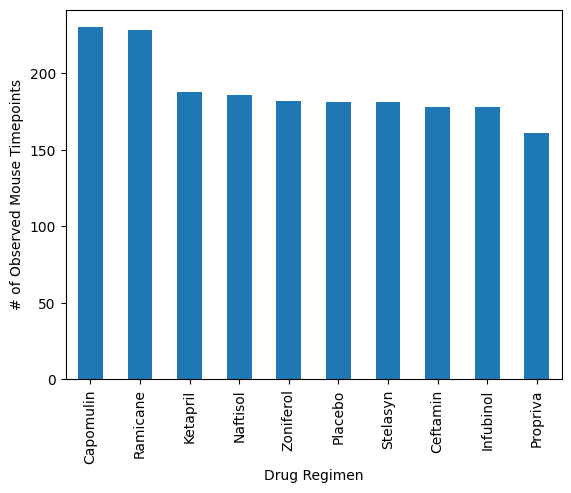

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = df.groupby(['Drug Regimen'])['Timepoint'].count() 


mouse_timepoints.sort_values(ascending=False).plot.bar()
plt.ylabel('# of Observed Mouse Timepoints')


plt.show()

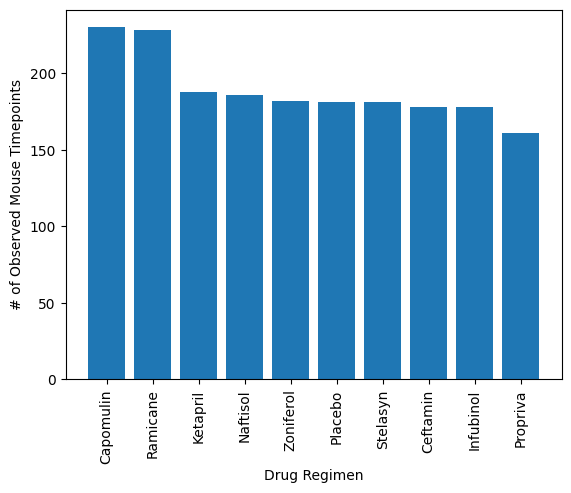

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_timepoints = df.groupby(['Drug Regimen'])['Timepoint'].count() 

descending_timepoints = mouse_timepoints.sort_values(ascending=False)

plt.bar(descending_timepoints.index, descending_timepoints.values)

plt.ylabel('# of Observed Mouse Timepoints', size=10) 
plt.xlabel('Drug Regimen') 
plt.xticks(rotation='vertical') 

plt.show()


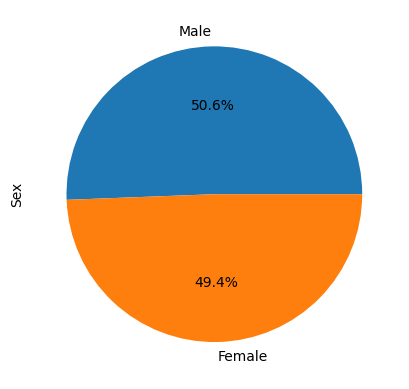

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_pie_chart = df["Sex"].value_counts()
gender_pie_chart.plot.pie(autopct= "%1.1f%%")

plt.ylabel("Sex")

plt.show()

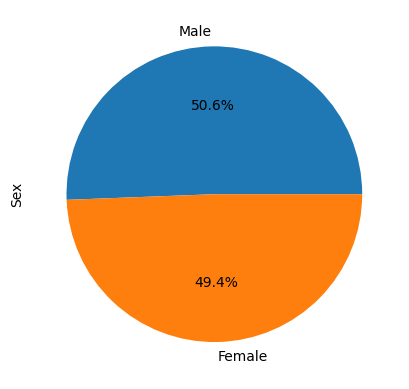

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = gender_pie_chart.plot.pie(y='Total Count', autopct="%1.1f%%")

plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [174]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

each_mouse = df.groupby(['Mouse ID']).max()


new_df = pd.merge(df, each_mouse, how="right", on=["Mouse ID", "Timepoint", "Drug Regimen",
                                                "Sex", "Metastatic Sites", "Tumor Volume (mm3)",
                                                "Weight (g)","Age_months"])


new_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [175]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

def get_outliers(regimen):
    drug_regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']

    quartiles = drug_regimen_data.quantile([.25,.5,.75])

    first_quartile = quartiles[0.25]
    last_quartile = quartiles[0.75]

    quartile_range = last_quartile - first_quartile

    lower_bound = first_quartile - (1.5 * quartile_range)
    upper_bound = last_quartile + (1.5 * quartile_range)

    outliers = drug_regimen_data.loc[(drug_regimen_data < lower_bound) | (drug_regimen_data > upper_bound)]

    print(f"{regimen}'s potential outliers:{outliers}")

    return drug_regimen_data

capomulin = get_outliers("Capomulin")
ramicane = get_outliers("Ramicane")
infubinol = get_outliers("Infubinol")
ceftamin = get_outliers("Ceftamin")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


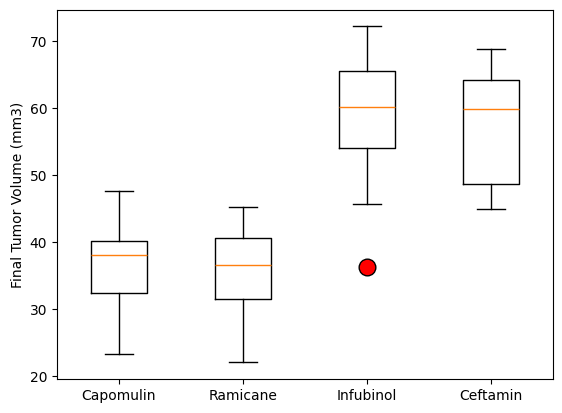

In [254]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=12)

plt.boxplot([capomulin, ramicane, infubinol, ceftamin],
            labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],
            flierprops= red_dot)

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

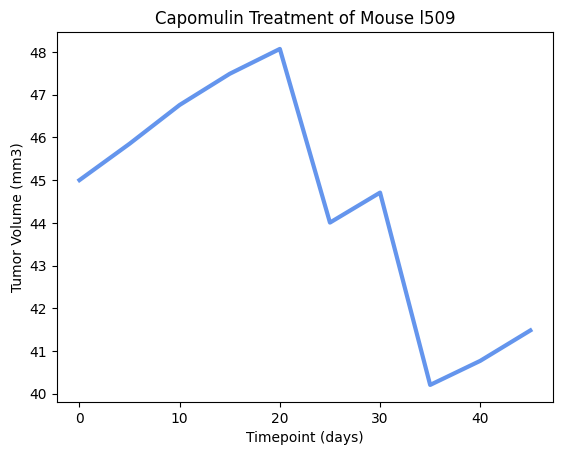

In [249]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_time_df = df.loc[df["Drug Regimen"] == "Capomulin",:]

line_scatter_df = tumor_time_df.loc[tumor_time_df["Mouse ID"] == "l509",:]
line_scatter_df.head()

timepoint_x = line_scatter_df["Timepoint"]
tumor_volume_y = line_scatter_df["Tumor Volume (mm3)"]

plt.title('Capomulin Treatment of Mouse l509')
plt.plot(timepoint_x, tumor_volume_y,linewidth=3,color="cornflowerblue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

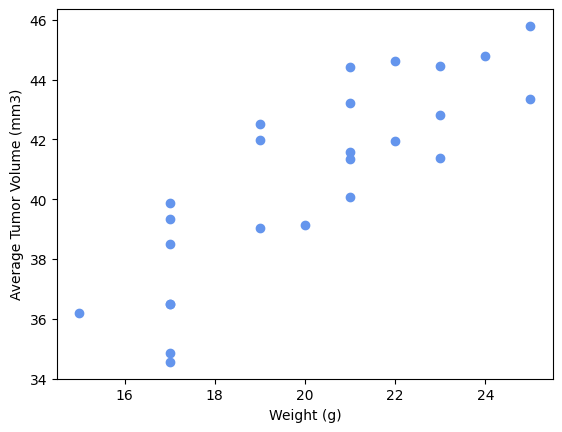

In [255]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

tumor_time_df = tumor_time_df.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

plt.scatter(tumor_time_df['Weight (g)'],
            tumor_time_df['Tumor Volume (mm3)'],
             color="cornflowerblue")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


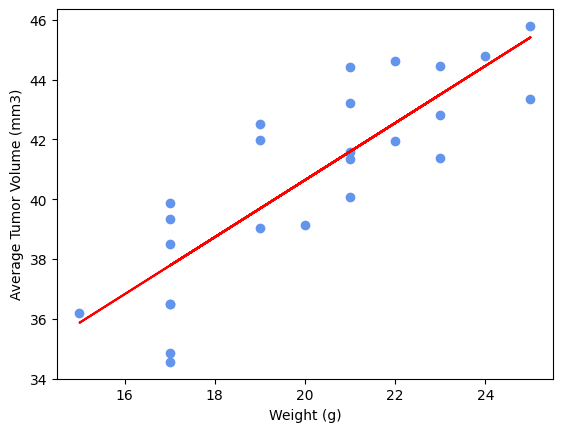

In [258]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(tumor_time_df['Weight (g)'],tumor_time_df['Tumor Volume (mm3)'])

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, std)=st.linregress(tumor_time_df["Weight (g)"],
                                                        tumor_time_df["Tumor Volume (mm3)"])

regression=tumor_time_df["Weight (g)"]* slope + intercept
line= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

tumor_time_df = tumor_time_df.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})


plt.scatter(tumor_time_df['Weight (g)'],
            tumor_time_df['Tumor Volume (mm3)'],
             color="cornflowerblue")
plt.plot(tumor_time_df["Weight (g)"], regression, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()